<a href="https://colab.research.google.com/github/EmanSalah2000/DataScience-Projects/blob/main/Heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction?select=Heart_Disease_Prediction.csv

# **Imports**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # for convert objects

from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


# **read_data**

In [86]:
Data= pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [87]:

Data['Heart Disease'] = Data['Heart Disease'].map({'Presence': 1, 'Absence': 0}) # convert the catigorical column into 0 and 1


# **Explore Data**

In [88]:
Data.head()
# Data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [89]:
Data.shape # rows , columns

(270, 14)

In [90]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [91]:
Data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [92]:
Data.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [93]:
Data.duplicated().sum()

0

# **Analysis**

In [94]:
Data['Heart Disease'].value_counts()

,count
Heart Disease,
0,150
1,120


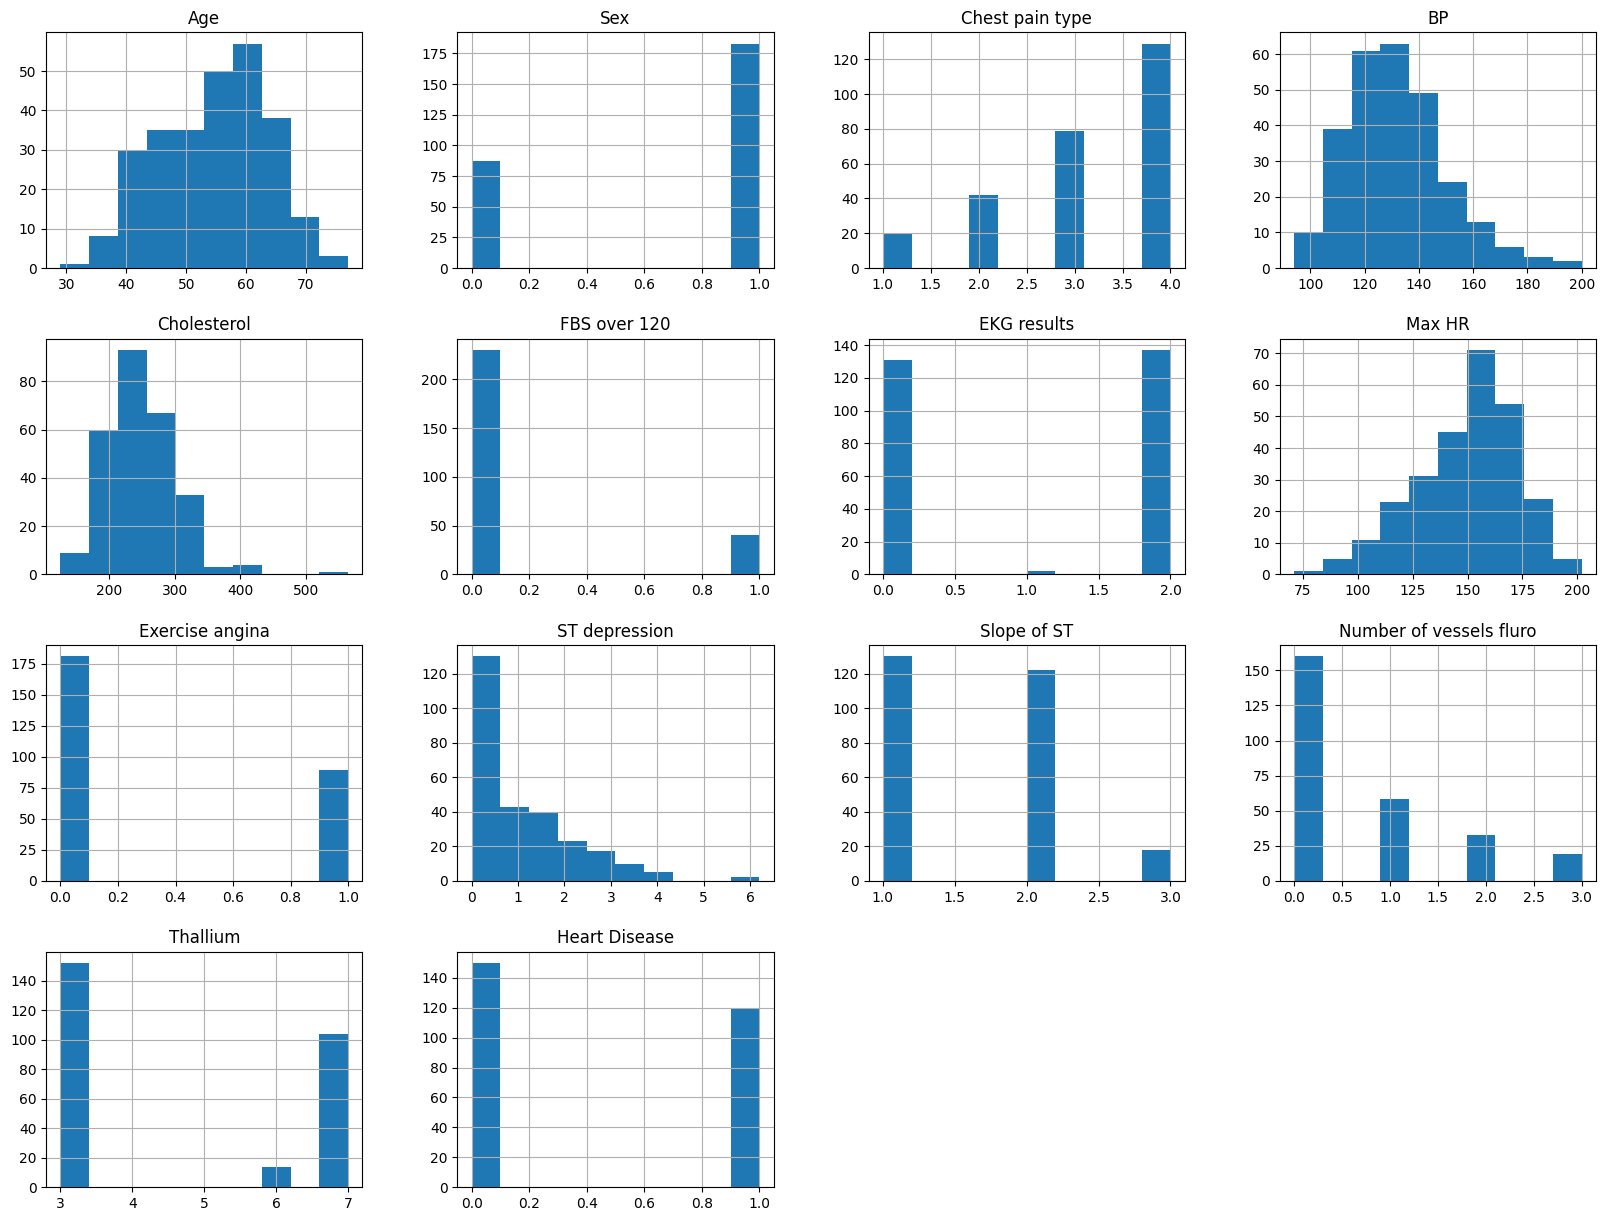

In [95]:
Data.hist(figsize=(20,15))
plt.show()

<Axes: >

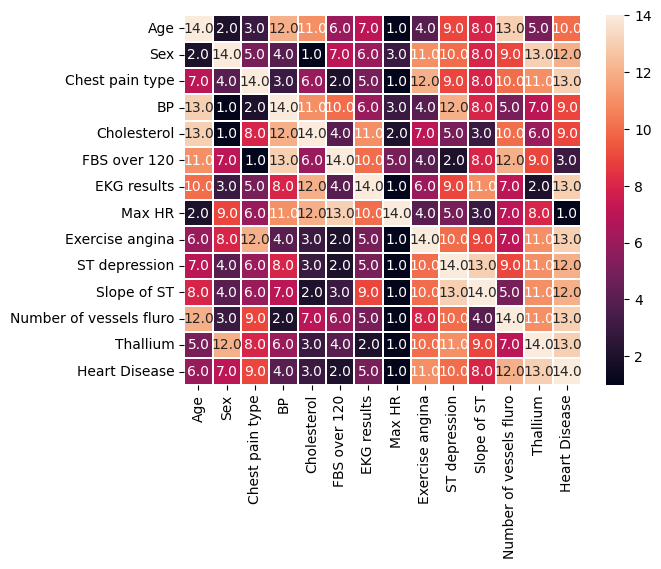

In [96]:
# sns.heatmap(Data.corr())
# sns.heatmap(Data.corr().rank(axis='columns'))
# sns.heatmap(Data.corr().rank(axis='columns'),annot=True)
# sns.heatmap(Data.corr().rank(axis='columns'),annot=True,fmt=".1f")
sns.heatmap(Data.corr().rank(axis='columns'),annot=True,fmt=".1f",linewidths=.2)

# **module**

In [97]:
# if the data has objects covert it to int
#  data.select_dtype(include='object)
#  data.select_dtype(exclude='object)


In [98]:
X=Data.iloc[:,:-1]
y=Data.iloc[:,-1]

In [99]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# **modeles**

In [100]:
def excute_train(model,x_train,y_train,x_test):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))




In [101]:
model =KNeighborsClassifier(n_neighbors=5)
excute_train(model,x_train,y_train,x_test)

[[21 10]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        31
           1       0.62      0.70      0.65        23

    accuracy                           0.69        54
   macro avg       0.68      0.69      0.68        54
weighted avg       0.69      0.69      0.69        54

0.6851851851851852


In [102]:
model= DecisionTreeClassifier()
excute_train(model,x_train,y_train,x_test)

[[22  9]
 [ 8 15]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        31
           1       0.62      0.65      0.64        23

    accuracy                           0.69        54
   macro avg       0.68      0.68      0.68        54
weighted avg       0.69      0.69      0.69        54

0.6851851851851852


In [103]:
model=LogisticRegression()
excute_train(model,x_train,y_train,x_test)

[[27  4]
 [ 5 18]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.82      0.78      0.80        23

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54

0.8333333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
model=GaussianNB()
excute_train(model,x_train,y_train,x_test)

[[28  3]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.86      0.83      0.84        23

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.87        54
weighted avg       0.87      0.87      0.87        54

0.8703703703703703


In [105]:
model=SVC()
excute_train(model,x_train,y_train,x_test)

[[26  5]
 [11 12]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        31
           1       0.71      0.52      0.60        23

    accuracy                           0.70        54
   macro avg       0.70      0.68      0.68        54
weighted avg       0.70      0.70      0.69        54

0.7037037037037037


In [106]:
model=RandomForestClassifier()
excute_train(model,x_train,y_train,x_test)

[[27  4]
 [ 5 18]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.82      0.78      0.80        23

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54

0.8333333333333334


In [107]:
model=GradientBoostingClassifier()
excute_train(model,x_train,y_train,x_test)

[[27  4]
 [ 6 17]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.81      0.74      0.77        23

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54

0.8148148148148148


In [ ]:
# the best classifier is naive bayes classifier with 87%